<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 서울 공공 자전거 이용 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/seoul_bike.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [121]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [122]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 bike 데이터프레임을 만듭니다.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_bike_202106.csv'
- 단축 경로: 'https://bit.ly/SeoulBikeFile'
- Decoding 오류가 발생하면 encoding='CP949' 옵션을 지정해 불러옵니다.

In [123]:
# 데이터 읽어오기
path = 'https://bit.ly/SeoulBikeFile'
bike = pd.read_csv(path, encoding='CP949')

## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [124]:
# 상위 5개 행 확인
bike.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-06,3,중랑센터,일일(회원),F,AGE_003,1,11.23,0.12,506.18,17
1,2021-06,3,중랑센터,정기,NaN,AGE_003,2,107.00,0.79,3377.56,17
2,2021-06,3,중랑센터,정기,M,AGE_002,6,352.15,3.18,13680.88,81
3,2021-06,3,중랑센터,정기,M,AGE_004,3,61.55,0.50,2158.72,21
4,2021-06,3,중랑센터,정기,M,AGE_005,3,125.30,1.10,4722.60,36


In [125]:
# 하위 5개 행 확인
bike.tail()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
119855,2021-06,88888,88888.영남배송,정기,F,AGE_002,1,0.00,0.00,0.00,9
119856,2021-06,88888,88888.영남배송,정기,M,AGE_002,2,218.93,1.97,8505.59,79
119857,2021-06,88888,88888.영남배송,정기,M,AGE_003,1,8.32,0.07,283.84,41
119858,2021-06,99997,도봉정비센터,일일(회원),M,AGE_005,1,NaN,NaN,0.00,4
119859,2021-06,99999,99999. 영남단말기정비,정기,NaN,AGE_008,6,0.00,0.00,0.00,235


**2) 열 데이터 형식, 값 개수**

- 어떤 열이 있고, 몇 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [126]:
# 열 정보 확인
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119860 entries, 0 to 119859
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     119860 non-null  object 
 1   대여소번호    119860 non-null  int64  
 2   대여소명     119860 non-null  object 
 3   대여구분코드   119860 non-null  object 
 4   성별       67702 non-null   object 
 5   연령대코드    119860 non-null  object 
 6   이용건수     119860 non-null  int64  
 7   운동량      119698 non-null  float64
 8   탄소량      119698 non-null  float64
 9   이동거리(M)  119860 non-null  float64
 10  이용시간(분)  119860 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 10.1+ MB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 데이터 분포 상황을 살펴봅니다.

In [127]:
# 기초통계정보 
bike.describe()

,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,119860.000000,119860.000000,1.196980e+05,119698.000000,1.198600e+05,119860.000000
mean,1902.517437,28.870407,8.869655e+03,20.455260,8.805111e+04,749.706699
std,1453.116590,56.813723,1.335818e+06,42.948015,1.850256e+05,1504.361808
min,3.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,806.000000,3.000000,2.032625e+02,1.840000,7.870930e+03,76.000000
50%,1640.000000,9.000000,7.376450e+02,6.590000,2.830418e+04,255.000000
75%,2654.000000,30.000000,2.454695e+03,21.720000,9.339718e+04,812.000000
max,99999.000000,1617.000000,4.000089e+08,2376.180000,1.024219e+07,87111.000000


**4) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [128]:
# 결측치 확인
bike.isnull().sum()

대여일자           0
대여소번호          0
대여소명           0
대여구분코드         0
성별         52158
연령대코드          0
이용건수           0
운동량          162
탄소량          162
이동거리(M)        0
이용시간(분)        0
dtype: int64

**5) 범주형 데이터 확인**

- 범주형 값을 갖는 열의 범주 값과 그 값의 개수를 확인합니다.

- 대여구분코드

In [129]:
# 대여구분코드
bike['대여구분코드'].value_counts()

정기         60530
일일(회원)     45514
단체          8914
일일(비회원)     2804
10분이용권      2098
Name: 대여구분코드, dtype: int64

- 성별

In [130]:
# 성별
bike['성별'].value_counts()

M    35383
F    32290
m       19
f       10
Name: 성별, dtype: int64

- 연령대코드

In [131]:
# 연령대코드
bike['연령대코드'].value_counts()

AGE_002    21982
AGE_003    19610
AGE_008    19395
AGE_004    18575
AGE_001    14720
AGE_005    14555
AGE_006     8180
AGE_007     2843
Name: 연령대코드, dtype: int64

- 대여소명

In [132]:
# 대여소명
bike['대여소명'].value_counts()

207. 여의나루역 1번출구 앞     85
502. 뚝섬유원지역 1번출구 앞    85
152. 마포구민체육센터 앞       84
2715.마곡나루역 2번 출구      81
583. 청계천 생태교실 앞       79
                      ..
상암센터 정비실               2
도봉정비센터                 1
99999. 영남단말기정비         1
4322.서울추모공원 입구         1
천호센터                   1
Name: 대여소명, Length: 2471, dtype: int64

**6) 데이터프레임 크기 확인**

In [133]:
bike.shape

(119860, 11)

## 3.데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 결측치 제거**

- 운동량, 탄소량 열은 결측치가 있는 행이 동일하고 몇 건 안되니 제거합니다.

In [134]:
# 결측치 제거
bike.dropna(subset = ['운동량', '탄소량'], axis=0, inplace=True)

# 확인
bike.isnull().sum()

대여일자           0
대여소번호          0
대여소명           0
대여구분코드         0
성별         52070
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리(M)        0
이용시간(분)        0
dtype: int64

**2) 결측치 채우기**

- 성별 열은 결측치가 너무 많습니다. 
- 성별별 분석 시 '남','녀' 외에 '기타'로 분석되게 'X'로 채웁니다.

In [135]:
# 결측치 채우기
bike.fillna('X', inplace=True)

# 확인
print(bike.isnull().sum())
print('-'*40)
print(bike['성별'].head())

대여일자       0
대여소번호      0
대여소명       0
대여구분코드     0
성별         0
연령대코드      0
이용건수       0
운동량        0
탄소량        0
이동거리(M)    0
이용시간(분)    0
dtype: int64
----------------------------------------
0    F
1    X
2    M
3    M
4    M
Name: 성별, dtype: object


**3) 데이터 변경**

- 성별이 소문자 m. f인 값을 대문자 M. F로 변경합니다.

In [136]:
# 성별 소문자 --> 대문자 변경
bike['성별'] = bike['성별'].map({'m':'M', 'f':'F', 'M':'M', 'F':'F', 'X':'X'})

# 확인
print(bike['성별'])
# 성별 소문자 --> 대문자 변경 bike.loc[bike['성별'] == 'm', '성별'] = 'M' bike.loc[bike['성별'] == 'f', '성별'] = 'F'

0         F
1         X
2         M
3         M
4         M
         ..
119854    M
119855    F
119856    M
119857    M
119859    X
Name: 성별, Length: 119698, dtype: object


- 연령대 코드를 이해하기 쉽게 10대~80대로 변경합니다.

In [137]:
# 연령대 데이터 변경
bike['연령대코드'] = bike['연령대코드'].map({'AGE_001':'10대',
                                   'AGE_002':'20대', 
                                   'AGE_003':'30대',
                                   'AGE_004':'40대',
                                   'AGE_005':'50대',
                                   'AGE_006':'60대',
                                   'AGE_007':'70대',
                                   'AGE_008':'80대'})

# 확인
print(bike['연령대코드'])

# bike['연령대코드'] = bike['연령대코드'].str[-1] + '0대'

0         30대
1         30대
2         20대
3         40대
4         50대
         ... 
119854    80대
119855    20대
119856    20대
119857    30대
119859    80대
Name: 연령대코드, Length: 119698, dtype: object


**4) 불필요한 열 제거**

- 분석에 큰 의미가 없는 대여일자, 대여소번호 열은 제거합니다.

In [138]:
# 대여일자, 대여소번호 제거
del_col = ['대여일자', '대여소번호']
bike.drop(columns=del_col, axis=1, inplace=True)

# 확인
bike.head()

,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,중랑센터,일일(회원),F,30대,1,11.23,0.12,506.18,17
1,중랑센터,정기,X,30대,2,107.00,0.79,3377.56,17
2,중랑센터,정기,M,20대,6,352.15,3.18,13680.88,81
3,중랑센터,정기,M,40대,3,61.55,0.50,2158.72,21
4,중랑센터,정기,M,50대,3,125.30,1.10,4722.60,36


**5) 열 이름 변경**

- 분석에 편의를 위해 열 이름을 간단명료하게 변경합니다.
    - 대여소명 --> 대여소
    - 대여구분코드 --> 대여구분
    - 연령대코드  --> 연령대
    - 이동거리(M) --> 이동거리
    - 이용시간(분) --> 이용시간

In [139]:
# 열 이름 변경

name = {'대여소명':'대여소',
       '대여구분코드':'대여구분',
       '연령대코드':'연령대',
        '이동거리(M)':'이동거리',
        '이용시간(분)':'이용시간'}
bike.rename(columns=name, inplace=True)

# 확인
bike.head()

,대여소,대여구분,성별,연령대,이용건수,운동량,탄소량,이동거리,이용시간
0,중랑센터,일일(회원),F,30대,1,11.23,0.12,506.18,17
1,중랑센터,정기,X,30대,2,107.00,0.79,3377.56,17
2,중랑센터,정기,M,20대,6,352.15,3.18,13680.88,81
3,중랑센터,정기,M,40대,3,61.55,0.50,2158.72,21
4,중랑센터,정기,M,50대,3,125.30,1.10,4722.60,36


**6) (추가) 평균거리, 평균시간 구하기**

In [140]:
bike['평균거리'] = bike['이동거리']/bike['이용건수']
bike['평균시간'] = bike['이용시간']/bike['이용건수']

bike.head()

,대여소,대여구분,성별,연령대,이용건수,운동량,탄소량,이동거리,이용시간,평균거리,평균시간
0,중랑센터,일일(회원),F,30대,1,11.23,0.12,506.18,17,506.180000,17.0
1,중랑센터,정기,X,30대,2,107.00,0.79,3377.56,17,1688.780000,8.5
2,중랑센터,정기,M,20대,6,352.15,3.18,13680.88,81,2280.146667,13.5
3,중랑센터,정기,M,40대,3,61.55,0.50,2158.72,21,719.573333,7.0
4,중랑센터,정기,M,50대,3,125.30,1.10,4722.60,36,1574.200000,12.0


## 4.데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 대여구분별 이용 건수**

- 대여구분별 이용 건수를 막대 그래프로 시각화해 확인합니다.
- 이용건수 합 단위가 크니 1,000으로 나누어 시각화에 사용합니다.

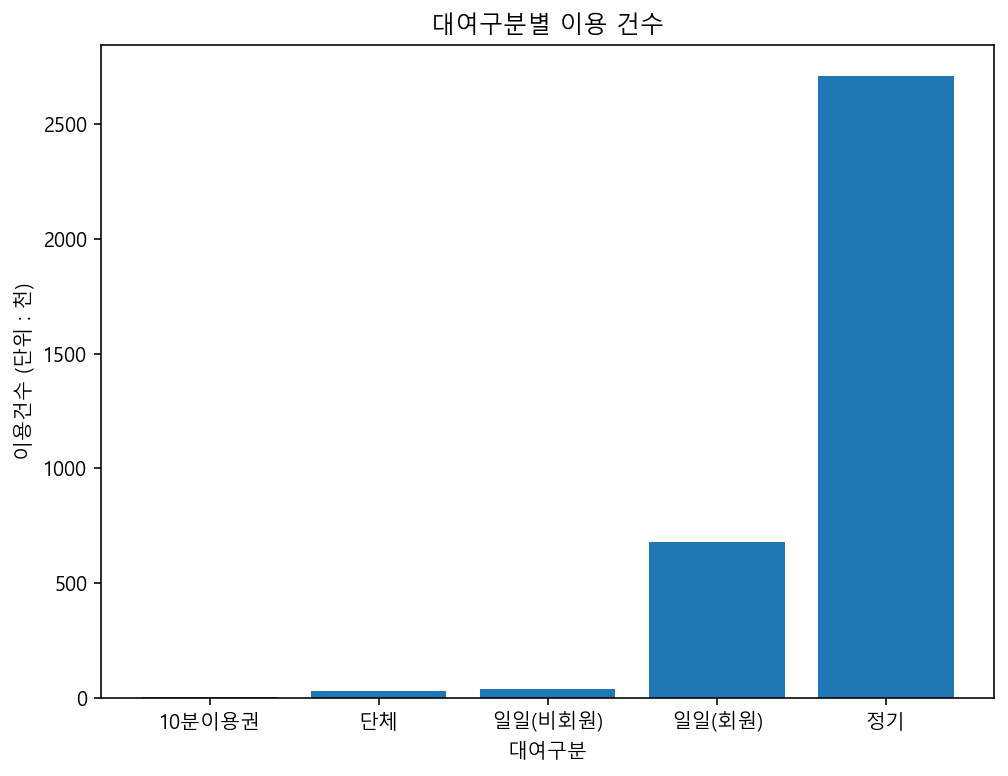

In [141]:
# 대여구분별 이용건수
tmp = bike.groupby(by='대여구분', as_index=False)['이용건수'].sum()

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(tmp['대여구분'], tmp['이용건수']/1000)
plt.title('대여구분별 이용 건수')
plt.xlabel('대여구분')
plt.ylabel('이용건수 (단위 : 천)')
plt.show()

**2) 대여소별 이용 건수 TOP 10**

- 대여소별 이용 건수 TOP 10을 막대 그래프로 시각화해 확인합니다.

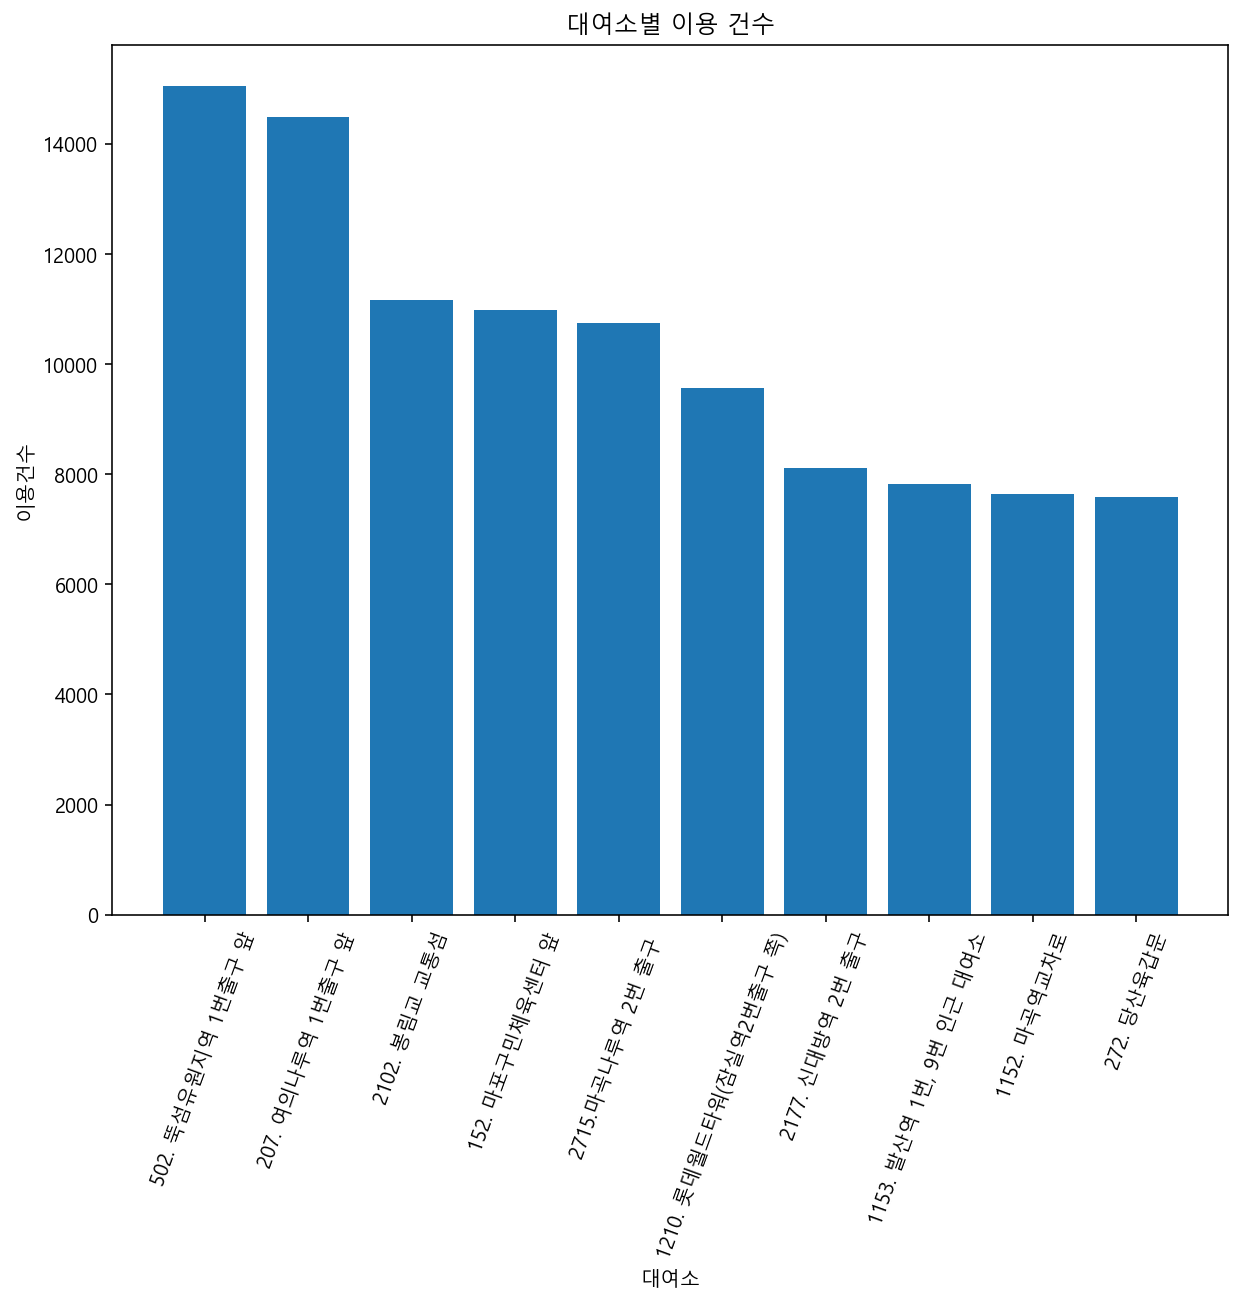

In [142]:
# 대여소별 이용건수 TOP 10
t_10 = bike.groupby(by='대여소', as_index=False)['이용건수'].sum()
tmp_10 = t_10.sort_values(by='이용건수', ascending=False).head(10)
tmp_10

# 시각화
plt.figure(figsize=(10, 8))
plt.bar(tmp_10['대여소'], tmp_10['이용건수'])
plt.title('대여소별 이용 건수')
plt.xlabel('대여소')
plt.ylabel('이용건수')
plt.xticks(rotation=70)
plt.show()

**3) (옵션) 연령대별 이용 건수**

- 연령대별 이용 건수를 막대 그래프로 시각화해 확인합니다.

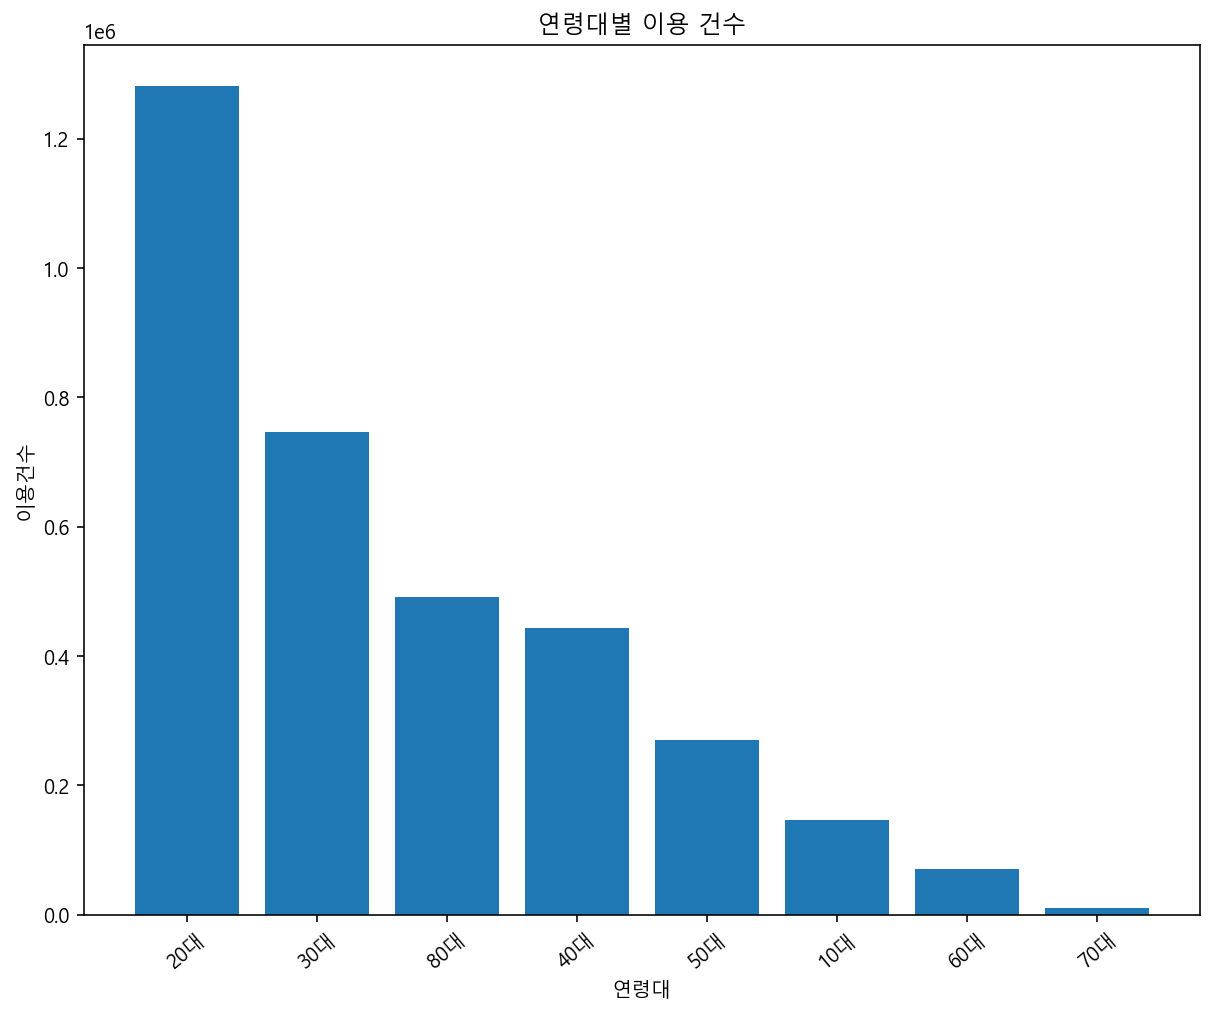

In [143]:
# 대여소별 이용건수 TOP 10
t_age = bike.groupby(by='연령대', as_index=False)['이용건수'].sum()
tmp_age = t_age.sort_values(by='이용건수', ascending=False)
tmp_age

# 시각화
plt.figure(figsize=(10, 8))
plt.bar(tmp_age['연령대'], tmp_age['이용건수'])
plt.title('연령대별 이용 건수')
plt.xlabel('연령대')
plt.ylabel('이용건수')
plt.xticks(rotation=40)
plt.show()

**4) (옵션) 성별별 이용 건수**

- 성별별 이용 건수를 막대 그래프로 시각화해 확인합니다.

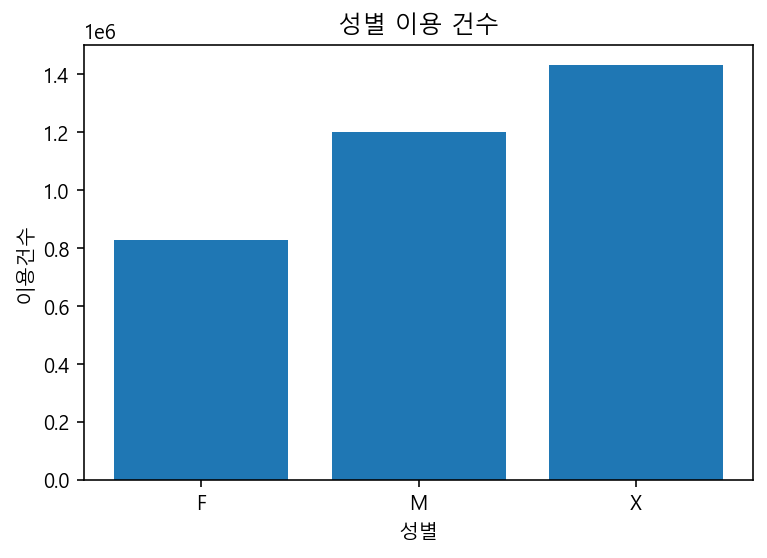

In [144]:
# 대여소별 이용건수 TOP 10
t_sex = bike.groupby(by='성별', as_index=False)['이용건수'].sum()

# 시각화
plt.bar(t_sex['성별'], t_sex['이용건수'])
plt.title('성별 이용 건수')
plt.xlabel('성별')
plt.ylabel('이용건수')
plt.show()

**5) (추가) 연령대별 평균이동시간**

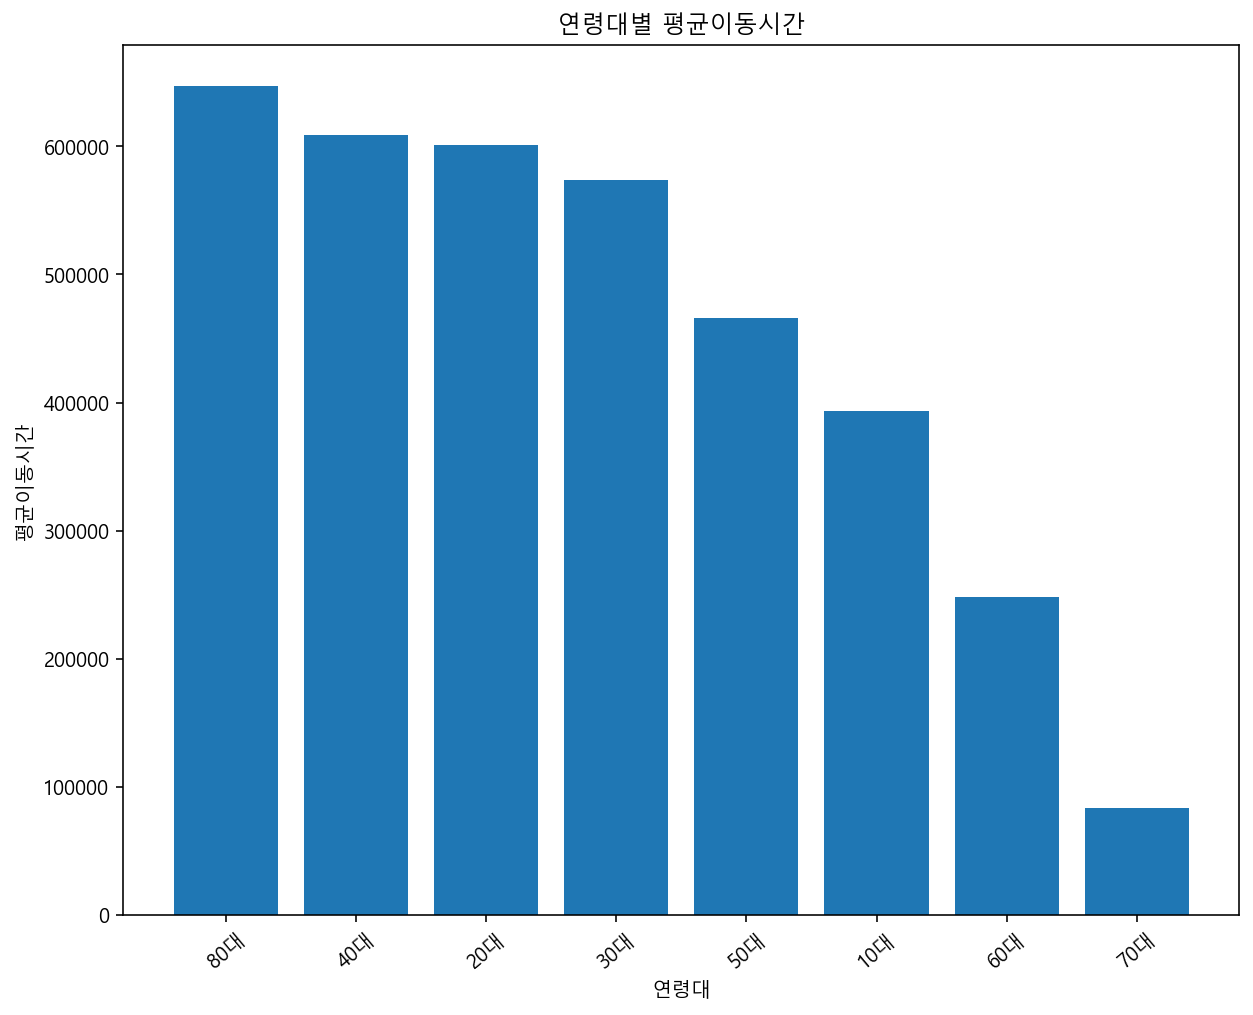

In [150]:
# 대여소별 이용건수 TOP 10
t_time = bike.groupby(by='연령대', as_index=False)['평균시간'].sum()
tmp_time = t_time.sort_values(by='평균시간', ascending=False)
tmp_time

# 시각화
plt.figure(figsize=(10, 8))
plt.bar(tmp_time['연령대'], tmp_time['평균시간'])
plt.title('연령대별 평균이동시간')
plt.xlabel('연령대')
plt.ylabel('평균이동시간')
plt.xticks(rotation=40)
plt.show()

## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.


**1) 의견**

- 많은 이용자들이 정기권을 끊어 사용하는 것으로 보아 지속적인 이용이 이뤄지는 것으로 보인다
- 연령대 중 20대, 30대가 가장 많이 이용하는 것으로 보인다. 
- 학교와 학원에 많이 머물러 있을 10대의 경우 이용건수가 적은 것으로 파악된다.
- 연령대 중 80대가 세 번째로 많이 이용하는것으로 보아 서울 '따릉이' 시스템은 노령자가 사용하기 편리하다 생각할 수 있다. 
- 하지만, 70대의 이용건수가 매우 적기 때문에 회원가입시 많은 이용자가 연령을 잘못 기입할 가능성이 있다.
- 성별 이용건수 중 결측치가 가장 많이 나타남으로 앱을 통한 성별 설문조사가 다시 이뤄져야 할 필요성이 보인다. 
- 대여소별 이용건수에서 한강을 중심으로 이용이 많이 이뤄지는 것으로 나타남으로 한강을 중심으로 '따릉이'의 수시 점검이 필요해 보인다.

**2) 기타**

- 따릉이를 탈 수 있는 환경이 잘 정비되어있어서 이용자가 많이 있던 것 같습니다. 전국적으로 확대가 되어 자전거 이용객이 많아지면 좋겠습니다.